# Reading and Writing Audio Files with python-wavefile

[back to overview page](index.ipynb)

https://github.com/vokimon/python-wavefile

## Reading

This is the quickest way to load the contents of an audio file into a NumPy array:

In [1]:
import wavefile
fs, sig = wavefile.load('data/test_wav_pcm16.wav')

Let's check if this actually worked:

In [2]:
fs

44100

In [3]:
import matplotlib.pyplot as plt

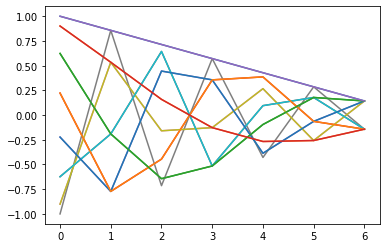

In [4]:
plt.plot(sig);

Hmm, that doesn't look quite right ... let's transpose the signal:

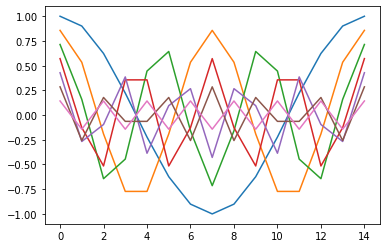

In [5]:
plt.plot(sig.T);

Yes, that's it!
The channels seem to be stored as rows of the array.
Let's see how they are stored in memory:

In [6]:
sig.flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

OK, the array data is stored in Fortran order, which isn't typical for NumPy, but it's necessary if the channels are supposed to be along the rows (at least without re-ordering the data obtained from the underlying C library).

In [7]:
sig.dtype

dtype('float32')

By default, audio samples are stored with `dtype='float32'`, which is common in audio applications.
It would be nice if we could actually choose which `dtype` we want to use, but that seems only possible when using `WaveReader`, which provides a few more advanced options.

In [8]:
from wavefile import WaveReader

In [9]:
r = WaveReader('data/test_wav_pcm16.wav')

In [10]:
r.channels, r.frames, r.samplerate

(7, 15, 44100)

In [11]:
r.format

65538

It's a bit hard to tell what that actually means ...

In [12]:
hex(r.format)

'0x10002'

The hardcore libsndfile users among you will know what that is:

In [13]:
from wavefile import Format
hex(Format.WAV), hex(Format.PCM_16), hex(Format.WAV | Format.PCM_16)

('0x10000', '0x2', '0x10002')

Ironically, reading from a `WaveReader` isn't that straightforward because we first have to provide an appropriate array to read into.
But luckily there is a function `buffer()` available which prepares an array for us:

In [14]:
data = r.buffer(1)  # let's read one frame only
r.read(data)
data

array([[0.9999695 ],
       [0.8571167 ],
       [0.7142639 ],
       [0.57141113],
       [0.42855835],
       [0.28570557],
       [0.14285278]], dtype=float32)

Again, the default `dtype` is `'float32'`, let's check if we can change that:

In [15]:
data = r.buffer(1, dtype='int16')
r.read(data)
data

array([[29522],
       [17511],
       [ 5208],
       [-4166],
       [-8756],
       [-8435],
       [-4681]], dtype=int16)

Now let's be nice and close the file.
Of course it would have been better if we would have used the `WaveReader` in a `with` statement (which is in fact the recommended usage).

In [16]:
r.close()

More exotic file type settings should also work, but let's check to be sure.

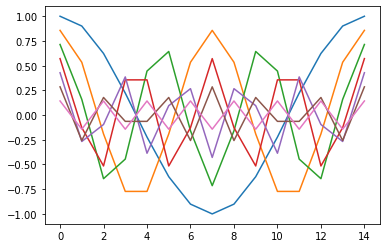

In [17]:
fs, sig = wavefile.load('data/test_wavex_pcm16.wav')
plt.plot(sig.T);

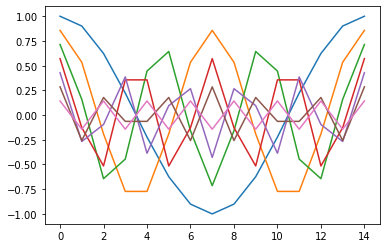

In [18]:
fs, sig = wavefile.load('data/test_wav_pcm24.wav')
plt.plot(sig.T);

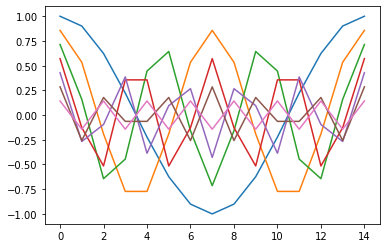

In [19]:
fs, sig = wavefile.load('data/test_wavex_pcm24.wav')
plt.plot(sig.T);

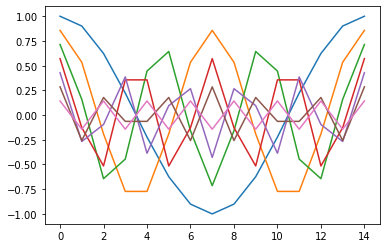

In [20]:
fs, sig = wavefile.load('data/test_wav_float32.wav')
plt.plot(sig.T);

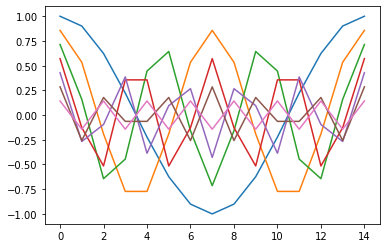

In [21]:
fs, sig = wavefile.load('data/test_wavex_float32.wav')
plt.plot(sig.T);

As expected, everything works!

## Writing

In [22]:
# TODO!

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>